Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

clean_inpatient_data() discards the irrelevant medical information columns. It cleans the data and modifies the column names from the data source in understandable terms. Also, it adds a column 'Admit for days' by calculating the difference between the start and the end date.

In [2]:
def clean_inpatient_data():
    df = pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/CMSInpatientData.csv')
    df = df.iloc[:,0:36]
    df['CLM_FROM_DT']=pd.to_datetime(df['CLM_FROM_DT'].astype(str), format='%Y%m%d')
    df['CLM_THRU_DT']=pd.to_datetime(df['CLM_THRU_DT'].astype(str), format='%Y%m%d')
    df['CLM_ADMSN_DT']=pd.to_datetime(df['CLM_ADMSN_DT'].astype(str), format='%Y%m%d')
    df['NCH_BENE_DSCHRG_DT']=pd.to_datetime(df['NCH_BENE_DSCHRG_DT'].astype(str), format='%Y%m%d')
    col = ['Benificiary Code', 'Claim Id', 'Claim Line Segment', 'Claims Start Date', 'Claims End Date', 
       'Provider Institution', 'Claim Payment Amount', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'Attending Physician', 
       'Operating Physician', 'Other Physician', 'Admission Date', 'Admitting Diagnosis Code', 
       'CLM_PASS_THRU_PER_DIEM_AMT', 'Deductible Amount', 'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM', 'CLM_UTLZTN_DAY_CNT', 'Discharge Date', 'Diagnosis Group Code', 
       'Claim Diagnosis Code_1', 'Claim Diagnosis Code_2', 'Claim Diagnosis Code_3', 'Claim Diagnosis Code_4', 
       'Claim Diagnosis Code_5', 'Claim Diagnosis Code_6', 'Claim Diagnosis Code_7', 'Claim Diagnosis Code_8', 
       'Claim Diagnosis Code_9', 'Claim Diagnosis Code_10', 'Claim Procedure Code_1', 'Claim Procedure Code_2', 
       'Claim Procedure Code_3', 'Claim Procedure Code_4', 'Claim Procedure Code_5', 'Claim Procedure Code_6']
    df = pd.DataFrame(np.array(df),columns=col)
    df['AdmitForDays'] = ((df['Discharge Date'] - df['Admission Date']).dt.days)+1
    return df

clean_outpatient_data() discards the irrelevant medical information columns. It cleans the data and 
modifies the column names from the data source in understandable terms.

In [3]:
def clean_outpatient_data():
    df = pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/CMSOutPatientData.csv')
    df = df.iloc[:,0:31]
    df['CLM_FROM_DT']=pd.to_datetime(df['CLM_FROM_DT'].astype(str), format='%Y%m%d')
    df['CLM_THRU_DT']=pd.to_datetime(df['CLM_THRU_DT'].astype(str), format='%Y%m%d')
    col = ['Benificiary Code', 'Claim Id', 'Claim Line Segment', 'Claims Start Date', 'Claims End Date', 
       'Provider Institution', 'Claim Payment Amount', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'Attending Physician', 
       'Operating Physician', 'Other Physician', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM', 'Claim Diagnosis Code_1', 
       'Claim Diagnosis Code_2', 'Claim Diagnosis Code_3', 'Claim Diagnosis Code_4','Claim Diagnosis Code_5',
       'Claim Diagnosis Code_6', 'Claim Diagnosis Code_7', 'Claim Diagnosis Code_8', 
       'Claim Diagnosis Code_9', 'Claim Diagnosis Code_10', 'Claim Procedure Code_1', 'Claim Procedure Code_2', 
       'Claim Procedure Code_3', 'Claim Procedure Code_4', 'Claim Procedure Code_5', 'Claim Procedure Code_6', 
       'NCH_BENE_PTB_DDCTBL_AMT', 'NCH_BENE_PTB_COINSRNC_AMT', 'Claim Admit Diagnosis Code']
    df = pd.DataFrame(np.array(df),columns=col)
    return df

clean_beneficiary_data() discards the irrelevant medical information columns. It cleans the data and modifies the column names from the data source in understandable terms. 
Also, it adds two columns, 'Age' by calculating the difference between the DOB and the DOD and 'WhetherDead'. 

In [4]:
def clean_beneficiary_data():
    df = pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/CMSBeneficiaryData.csv')
    col = ['Benificiary Code', 'DOB', 'DOD', 'Gender', 'Race_code', 'Renal Disease Indicator', 'State', 
           'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'NoOfMonths_HMOCov', 'NoOfMonths_PartDCov', 
       'Chronic Condition Alzeimer', 
       'Chronic Condition Heart Failure', 'Chronic Condition Kidney Disease', 'Chronic Condition Cancer', 
       'Chronic Condition Obstr Pulmonary',
       'Chronic Condition Depression', 'Chronic Condition Diabetes', 'Chronic Condition Ischemic Heart Disease', 
       'Chronic Condition Osteoporosis',
       'Chronic Condition Rhematoidarthritis', 'Chronic Condition Stroke', 'IP Annual Reimbersement Amt', 
       'BENRES_IP', 'PPPYMT_IP', 'OP Annual Reimbersement Amt', 'BENRES_OP', 'PPPYMT_OP', 'MEDREIMB_CAR',  
       'BENRES_CAR', 'PPPYMT_CAR']
    df = pd.DataFrame(np.array(df),columns=col)
    df['DOB']=pd.to_datetime(df['DOB'].astype(str), format='%Y%m%d')
    df['DOD']=pd.to_datetime(df['DOD'].astype(str), format='%Y%m%d', errors='ignore')
    df = df.replace({'Chronic Condition Alzeimer': 2, 
       'Chronic Condition Heart Failure': 2, 'Chronic Condition Kidney Disease': 2, 'Chronic Condition Cancer': 2, 
       'Chronic Condition Obstr Pulmonary': 2,
       'Chronic Condition Depression': 2, 'Chronic Condition Diabetes': 2, 'Chronic Condition Ischemic Heart Disease': 2, 
       'Chronic Condition Osteoporosis': 2,
       'Chronic Condition Rhematoidarthritis': 2, 'Chronic Condition Stroke': 2}, 0)
    df['Age'] = round(((df['DOD'] - df['DOB']).dt.days)/365)
    df['Age'] = df['Age'].fillna(round(((pd.to_datetime('2008-12-01' , format = '%Y-%m-%d') - df['DOB']).dt.days)/365))  
    df.loc[df.DOD.isna(),'WhetherDead']=0
    df.loc[df.DOD.notna(),'WhetherDead']=1
    return df

merge_data() merges the inpatient and outpatient records using the unique beneficiary values as the inner join key.

In [5]:
def merge_data(df_inpatient, df_outpatient, df_beneficiary):
    df_all_patient_data = pd.merge(df_outpatient,df_inpatient,
                              left_on=['Benificiary Code', 'Claim Id', 'Claim Line Segment',
       'Claims Start Date', 'Claims End Date', 'Provider Institution',
       'Claim Payment Amount', 'NCH_PRMRY_PYR_CLM_PD_AMT',
       'Attending Physician', 'Operating Physician', 'Other Physician',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM', 'Claim Diagnosis Code_1',
       'Claim Diagnosis Code_2', 'Claim Diagnosis Code_3',
       'Claim Diagnosis Code_4', 'Claim Diagnosis Code_5',
       'Claim Diagnosis Code_6', 'Claim Diagnosis Code_7',
       'Claim Diagnosis Code_8', 'Claim Diagnosis Code_9',
       'Claim Diagnosis Code_10', 'Claim Procedure Code_1',
       'Claim Procedure Code_2', 'Claim Procedure Code_3',
       'Claim Procedure Code_4', 'Claim Procedure Code_5',
       'Claim Procedure Code_6'],
                              right_on=['Benificiary Code', 'Claim Id', 'Claim Line Segment',
       'Claims Start Date', 'Claims End Date', 'Provider Institution',
       'Claim Payment Amount', 'NCH_PRMRY_PYR_CLM_PD_AMT',
       'Attending Physician', 'Operating Physician', 'Other Physician',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM', 'Claim Diagnosis Code_1',
       'Claim Diagnosis Code_2', 'Claim Diagnosis Code_3',
       'Claim Diagnosis Code_4', 'Claim Diagnosis Code_5',
       'Claim Diagnosis Code_6', 'Claim Diagnosis Code_7',
       'Claim Diagnosis Code_8', 'Claim Diagnosis Code_9',
       'Claim Diagnosis Code_10', 'Claim Procedure Code_1',
       'Claim Procedure Code_2', 'Claim Procedure Code_3',
       'Claim Procedure Code_4', 'Claim Procedure Code_5',
       'Claim Procedure Code_6'],how='outer')
    all_patient_data = pd.merge(df_all_patient_data,df_beneficiary,
                                     left_on='Benificiary Code',right_on='Benificiary Code',how='inner')
    return all_patient_data

clean_data() calls all the above data cleaning functions for inpatient, outpatient and beenficiary files respectively, 
merges the data and returns it to the calling function.

In [6]:
def clean_data():
    train_inpatient = clean_inpatient_data()
    train_outpatient = clean_outpatient_data()
    train_beneficiary = clean_beneficiary_data()
    train_all_patient_data = merge_data(train_inpatient, train_outpatient, train_beneficiary)
    return train_all_patient_data

process_test_data performs all the cleaning and processing actions on the test data.

In [7]:
def process_test_data():
    Test_Beneficiarydata=pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/KaggleTest_Beneficiarydata.csv')
    Test_Inpatientdata=pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/KaggleTest_Inpatientdata.csv')
    Test_Outpatientdata=pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/KaggleTest_Outpatientdata.csv')
    
    
    Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
    Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
    Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

    Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 
                           'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

    Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

    Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
    Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
    Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)
    
    Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)
    
    Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
    Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1

    Test_Allpatientdata=pd.merge(Test_Outpatientdata, Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')
    Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')        #return Test_AllPatientDetailsdata
    return Test_AllPatientDetailsdata    

data_conversion_to_number() handles the missing values and 
drops all the non-numerical values in the training and the testing data set.

In [8]:
def data_conversion_to_number():
    train_all_patient_data = clean_data()
    train_all_patient_data = train_all_patient_data.drop(columns=['Claim Line Segment', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
                                   'NCH_BENE_PTB_COINSRNC_AMT', 'Admitting Diagnosis Code', 'CLM_PASS_THRU_PER_DIEM_AMT',
                                   'Deductible Amount', 'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'CLM_UTLZTN_DAY_CNT',
                                   'NoOfMonths_HMOCov', 'NoOfMonths_PartDCov', 'BENRES_IP', 'BENRES_OP', 'MEDREIMB_CAR',
                                   'BENRES_CAR', 'PPPYMT_CAR'])
    test_all_patient_data = process_test_data()

    number_columns= train_all_patient_data.select_dtypes([np.number]).columns
    train_number_data = train_all_patient_data[number_columns].fillna(value=0)

    number_columns= test_all_patient_data.select_dtypes([np.number]).columns
    test_number_data = test_all_patient_data[number_columns].fillna(value=0)

    train_number_data = train_number_data.drop(columns=['Claim Payment Amount', 'Attending Physician',
           'Operating Physician', 'Other Physician'])
    test_number_data = test_number_data.drop(columns=['ClmProcedureCode_2',
           'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
           'ClmProcedureCode_6', 'DeductibleAmtPaid'])

    train_number_data[train_number_data.columns] = train_number_data[train_number_data.columns].fillna(value=0)
    test_number_data[test_number_data.columns] = test_number_data[test_number_data.columns].fillna(value=0)
    return train_number_data, test_number_data

create_train_test_labels() labels the unsupervied training records using the anomaly/outlier detection technique for further training the classifier model (-1 - Fraudulent / 1 - Non-Fraudulent). The labels for test data are created by using the trained classifier.

In [9]:
def create_train_test_labels():
    X_tr, X_te = data_conversion_to_number()
    sc = StandardScaler() 
    X = sc.fit_transform(X_tr)
    clf = LocalOutlierFactor(n_neighbors=2)
    X_train = pd.DataFrame(X).iloc[:100000,:]
    y_train = clf.fit_predict(X_train)
    sm = SMOTE(random_state = 2) 
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
    log_reg = LogisticRegressionCV(cv=10, class_weight='balanced')
    log_reg.fit(X_train_res, y_train_res)
    X_test = sc.transform(X_te)
    y_predict = log_reg.predict(X_test)
    y_test = pd.read_csv('/Users/snehawattamwar/Downloads/Data Mining Project/DataFiles/KaggleTest_trueLabels.csv')
    return y_predict, y_test

predict_f1_score() predicts lables for each test record. Further, these records are grouped 
by the unique provider id and the label for fraud/non-fraud is decided by the maximum class records. 

In [10]:
def predict_f1_score():
    testList = y_predict.tolist()
    test_all_patient_data = process_test_data()
    test_all_patient_data['label'] = testList
    df_test = test_all_patient_data[['Provider','label']].copy()
    grouped = df_test.groupby(['Provider']).sum()
    grouped_new = grouped.sort_index()
    y_test.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
    trueLabels = y_test['PotentialFraud'].to_numpy()
    pred = []
    for index,row in grouped_new.iterrows():
        if(row['label']>0):
            pred.append(0)
        else:
            pred.append(1)
    print(f1_score(trueLabels.astype(int), pred, average='weighted'))
    return trueLabels, pred

Call the create_train_test_labels() and predict_f1_score()

In [11]:
y_predict, y_test = create_train_test_labels()
true_labels, pred = predict_f1_score()

0.8619985325833521


Data Visualization and analysis

show_highest_diagnosis_code_in_fradulent_data() displays frequency 
of diagnosis group code in fraudulent recods.

In [12]:
def show_highest_diagnosis_code_in_fradulent_data():
    testList = y_predict.tolist()
    test_all_patient_data = process_test_data()
    test_all_patient_data['label'] = testList
    fradulent_patient_data = test_all_patient_data[test_all_patient_data.label == -1]
    fradulent_patient_data = fradulent_patient_data.fillna(0)
    
    df_diagnosis =  pd.DataFrame(columns = ['Diagnosis'])
    df_diagnosis['Diagnosis'] = pd.concat([fradulent_patient_data['ClmDiagnosisCode_1'], 
                                           fradulent_patient_data['ClmDiagnosisCode_2'], 
                                           fradulent_patient_data['ClmDiagnosisCode_3'], 
                                           fradulent_patient_data['ClmDiagnosisCode_4'], 
                                           fradulent_patient_data['ClmDiagnosisCode_5'], 
                                           fradulent_patient_data['ClmDiagnosisCode_6'], 
                                           fradulent_patient_data['ClmDiagnosisCode_7'],  
                                           fradulent_patient_data['ClmDiagnosisCode_8'], 
                                           fradulent_patient_data['ClmDiagnosisCode_9'], 
                                           fradulent_patient_data['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()
    
    grouped_diagnosis = df_diagnosis['Diagnosis'].value_counts()
    
    grouped_diagnosis = grouped_diagnosis.to_frame()
    grouped_diagnosis.columns = ['count']
    grouped_diagnosis['Diagnosis'] = grouped_diagnosis.index
    grouped_diagnosis['Percentage'] = (grouped_diagnosis['count']/sum(grouped_diagnosis['count']))*100
    plot_diagnosis = grouped_diagnosis.iloc[1:].head(20)
    plot_diagnosis.plot(x ='Diagnosis', y='Percentage', kind = 'bar', color = 'g')

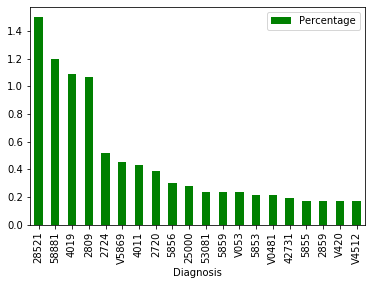

In [13]:
show_highest_diagnosis_code_in_fradulent_data()

show_highest_procedure_code_in_fradulent_data() displays frequency 
of procedure code in fraudulent recods.

In [14]:
def show_highest_procedure_code_fradulent_data():
    testList = y_predict.tolist()
    test_all_patient_data = process_test_data()
    test_all_patient_data['label'] = testList
    fradulent_patient_data = test_all_patient_data[test_all_patient_data.label == 1]
    fradulent_patient_data = fradulent_patient_data.fillna(0)
    
    df_procedures =  pd.DataFrame(columns = ['Procedures'])
    df_procedures['Procedures'] = pd.concat([fradulent_patient_data['ClmProcedureCode_1'], 
                                             fradulent_patient_data['ClmProcedureCode_2'], 
                                          fradulent_patient_data['ClmProcedureCode_3'], 
                                             fradulent_patient_data['ClmProcedureCode_4'], 
                                          fradulent_patient_data['ClmProcedureCode_5'], 
                                             fradulent_patient_data['ClmProcedureCode_6']], 
                                          axis=0, sort=True).dropna()
    
    grouped_procedure = df_procedures['Procedures'].value_counts()
    grouped_procedures = grouped_procedure.to_frame()
    grouped_procedures.columns = ['count']
    grouped_procedures['Procedure'] = grouped_procedure.index
    grouped_procedures['Percentage'] = (grouped_procedures['count']/sum(grouped_procedures['count']))*100
    plot_procedures = grouped_procedures.iloc[1:].head(20)
    plot_procedures.plot(x ='Procedure', y='Percentage', kind = 'bar', color = 'g')

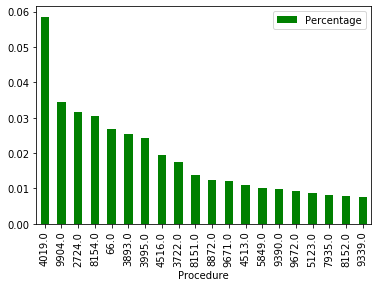

In [15]:
show_highest_procedure_code_fradulent_data()

plot_for_state_diagnosis_code() displays the top 3 Diagnosis code for the given potential fraudulent state.

In [16]:
def plot_for_state_diagnosis_code(State):
    testList = y_predict.tolist()
    test_all_patient_data = process_test_data()
    test_all_patient_data['label'] = testList
    fradulent_patient_data = test_all_patient_data[test_all_patient_data.label == 1]
    fradulent_patient_data = fradulent_patient_data.fillna(0)

    df_1 = fradulent_patient_data[fradulent_patient_data['State']== State]
    df_1.head()
    df_3 = df_1[df_1['Provider']== df_1['Provider'].value_counts().head().index[0]]
    df_4 = df_1[df_1['Provider']== df_1['Provider'].value_counts().head().index[1]]
    df_5 = df_1[df_1['Provider']== df_1['Provider'].value_counts().head().index[2]]
    df_2 = pd.concat([df_3, df_4, df_5], ignore_index=True)
    df_diagnosis =  pd.DataFrame(columns = ['Diagnosis'])
    df_diagnosis['Diagnosis'] = pd.concat([df_2['ClmDiagnosisCode_1'], 
                                                 df_2['ClmDiagnosisCode_2'],
                                          df_2['ClmDiagnosisCode_3'],
                                          df_2['ClmDiagnosisCode_4'],
                                          df_2['ClmDiagnosisCode_5'],
                                          df_2['ClmDiagnosisCode_6'],
                                          df_2['ClmDiagnosisCode_7'],
                                          df_2['ClmDiagnosisCode_8'],
                                          df_2['ClmDiagnosisCode_9'],
                                          df_2['ClmDiagnosisCode_10'],], 
                                              axis=0, sort=True).dropna()

    grouped_diagnosis = df_diagnosis['Diagnosis'].value_counts().head().iloc[1:]
    grouped_diagnosis = grouped_diagnosis.to_frame()
    grouped_diagnosis.columns = ['count']
    grouped_diagnosis['Diagnosis'] = grouped_diagnosis.index
    grouped_diagnosis['Percentage'] = (grouped_diagnosis['count']/sum(grouped_diagnosis['count']))*100

    plot_diagnosis = grouped_diagnosis.iloc[1:].head(20)
    plot_diagnosis.plot(x ='Diagnosis', y='Percentage', kind = 'bar', color = 'g')

state_fraud() helps to find the state with most number of potential fraud records. (Here, smaller value represents potential fraud as the records are labeled as -1 which decreases the sum of all the labels assigned to that state)

In [17]:
def state_fraud(X_train_original):
    print("Sates with most suspected fradulaent cases.")
    X_train_original.groupby('State')['Label'].sum().plot(kind='bar')
    X_t = X_train_original.groupby('State')['Label'].sum()
    print(X_t.nsmallest(5))

state_provider() helps to find the state with maximum number of provider institutions.

In [18]:
def state_provider(X_train_original):
    print("Sates with maximum number of provider institution.")
    X_display = X_train_original
    X_display.groupby('State')['Provider Institution'].nunique().plot(kind='bar')
    X_p = X_display.groupby('State')['Provider Institution'].nunique()
    print(X_p.nlargest(5))

state_fraud_non() displays the ratio of percentages of potential fraud to non-fraud cases in every state.

In [19]:
def state_fraud_non(X_train_original):
    print("Ratio of fraudulent to non-fraudulent cases.")
    X_train_original.groupby(['State','Label']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

state_vs_fraud_providers_graphs() calls all the state related graph display functions.

In [20]:
def state_vs_fraud_providers_graphs():
    train_all_patient_data = clean_data()
    X_train_original = train_all_patient_data.iloc[:50000,:]
    X_tr, X_te = data_conversion_to_number()
    sc = StandardScaler() 
    X = sc.fit_transform(X_tr)
    clf = LocalOutlierFactor(n_neighbors=2)
    X_train = pd.DataFrame(X).iloc[:50000,:]
    y_train = clf.fit_predict(X_train)
    labelList = y_train.tolist()
    X_train_original['Label'] = labelList
    state_fraud(X_train_original)
    state_fraud_non(X_train_original)
    state_provider(X_train_original)

Sates with most suspected fradulaent cases.
State
47    19
9     41
53    57
8     69
2     70
Name: Label, dtype: int64
Ratio of fraudulent to non-fraudulent cases.


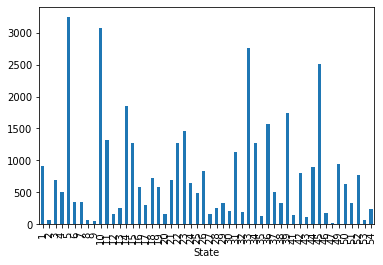

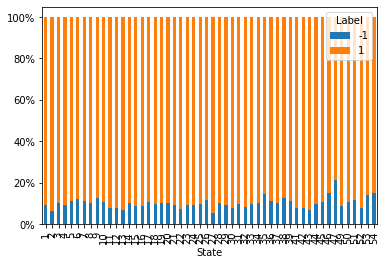

Sates with maximum number of provider institution.
State
10    794
5     603
33    454
45    450
3     295
Name: Provider Institution, dtype: int64


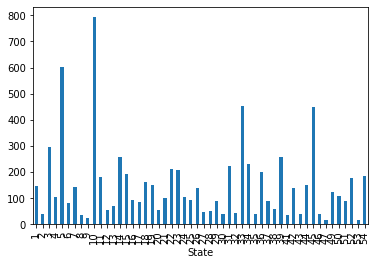

In [21]:
state_vs_fraud_providers_graphs()

Using the plot_for_state_diagnosis_code(), the graphs are displayed for the top 3 states with the most fraudulent cases obtained above.

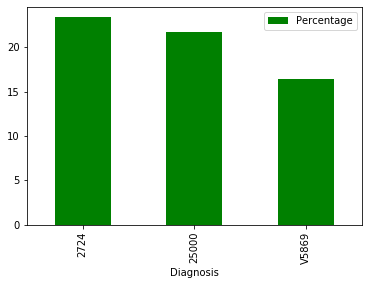

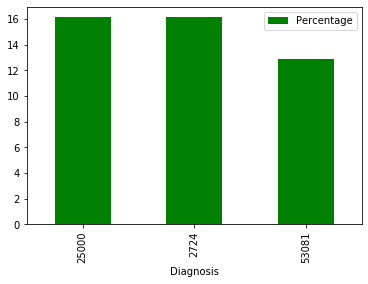

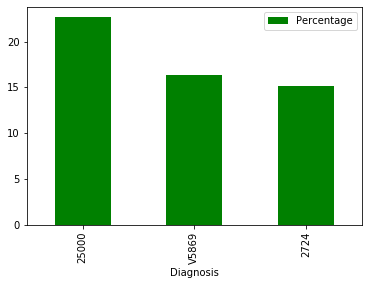

In [22]:
list =[47, 9, 53]
for i in range(len(list)): 
    plot_for_state_diagnosis_code(list[i])

max_claim_vs_DGC() displays the averaged Claim Payment Amount for every unique Diagnosis group code.

In [23]:
def max_claim_vs_DGC():
    train_inpatient_data = clean_inpatient_data()
    df_claimPaymentAmount = train_inpatient_data.groupby('Diagnosis Group Code')['Claim Payment Amount'].sum()
    df_admitDays = train_inpatient_data.groupby('Diagnosis Group Code')['AdmitForDays'].sum()
    df_averaged = df_claimPaymentAmount/df_admitDays
    df_averaged.plot()

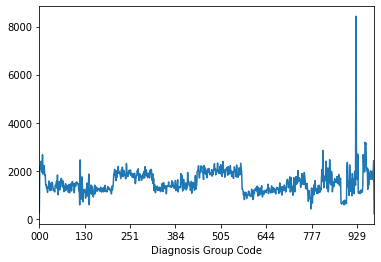

In [24]:
max_claim_vs_DGC()

df_averaged_sorted() displays the sorted values graph for the above graph

In [25]:
def df_averaged_sorted():
    train_inpatient_data = clean_inpatient_data()
    df_claimPaymentAmount = train_inpatient_data.groupby('Diagnosis Group Code')['Claim Payment Amount'].sum()
    df_admitDays = train_inpatient_data.groupby('Diagnosis Group Code')['AdmitForDays'].sum()
    df = df_claimPaymentAmount/df_admitDays
    df.sort_values(ascending=False).plot()

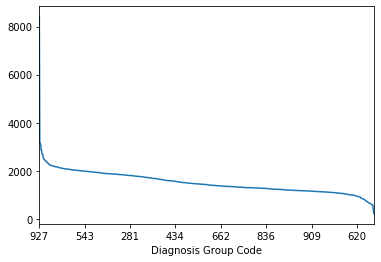

In [26]:
df_averaged_sorted()

provider_AnRA() displays the Annual Reimbursement Amount for every unique provider.

In [27]:
def provider_AnRA():
    train_all_patient_data = clean_data()
    X_train_original = train_all_patient_data.iloc[:50000,:]
    X_tr, X_te = data_conversion_to_number()
    sc = StandardScaler() 
    X = sc.fit_transform(X_tr)
    clf = LocalOutlierFactor(n_neighbors=2)
    X_train = pd.DataFrame(X).iloc[:50000,:]
    y_train = clf.fit_predict(X_train)
    labelList = y_train.tolist()
    X_train_original['Label'] = labelList    
    X_train_original.groupby('Provider Institution')['IP Annual Reimbersement Amt'].sum().plot()

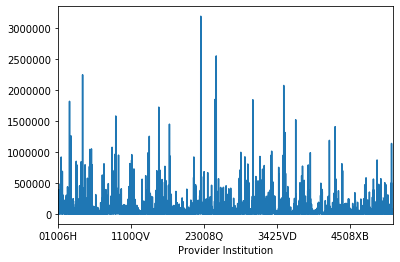

In [28]:
provider_AnRA()

fraud_vs_non_fraud() displays number of fraudulent/non-fraudulent records in the training set.

In [29]:
def fraud_vs_non_fraud():
    train_all_patient_data = clean_data()
    X_train_original = train_all_patient_data.iloc[:50000,:]
    X_tr, X_te = data_conversion_to_number()
    sc = StandardScaler() 
    X = sc.fit_transform(X_tr)
    clf = LocalOutlierFactor(n_neighbors=2)
    X_train = pd.DataFrame(X).iloc[:50000,:]
    y_train = clf.fit_predict(X_train)
    labelList = y_train.tolist()
    X_train['Label'] = labelList 
    count_classes_provider = pd.value_counts(X_train['Label'], sort = True)
    LABELS = ["Non Fraud", "Fraud"]
    count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6),color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.title("Potential Fraud distribution in individual Providers data")
    plt.xticks(range(2), LABELS)
    plt.xlabel("Potential Fraud Class ")
    plt.ylabel("Number of PotentialFraud per Class ")
    plt.savefig('PotentialFraudDistributionImbalance')

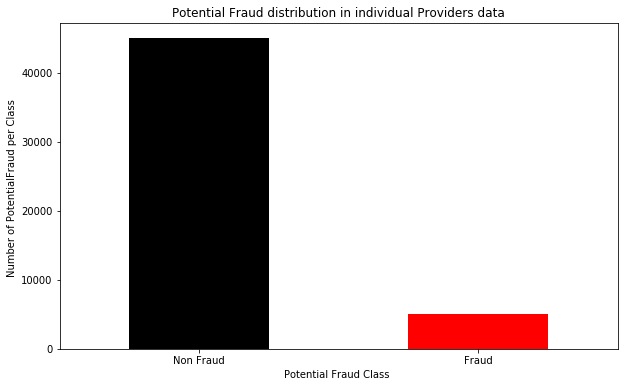

In [30]:
fraud_vs_non_fraud()